**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Step 1: Understanding the Problem**

In this case, our goal is to build a machine learning model that can effectively classify text messages as spam or ham.This is a binary classification problem

**Step 2: Data Collection**

For this project, we are using the Kaggle Spam Text Message Classification Dataset

**Step 3: Data Preprocessing**

Data preprocessing involves cleaning and transforming the data to prepare it for analysis and modeling

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Load the dataset
data = pd.read_csv("/content/gdrive/MyDrive/Assignment 3 Datasets/SPAM text messages.csv", encoding='latin-1')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data cleaning and preprocessing
data.drop_duplicates(inplace=True)  # Remove duplicates
data.dropna(inplace=True)  # Remove missing values
data['Message'] = data['Message'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))  # Remove special characters

In [ ]:
# Split the data into train and test sets
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Step 4: Data Exploration**

Data exploration involves visualizing and analyzing the dataset to gain insights.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Word cloud for spam messages
spam_words = ' '.join(list(data[data['Category'] == 'spam']['Message']))
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

In [ ]:
# Word cloud for ham messages
ham_words = ' '.join(list(data[data['Category'] == 'ham']['Message']))
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

(-0.5, 799.5, 399.5, -0.5)

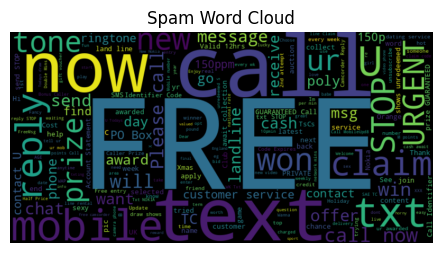

In [ ]:
# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

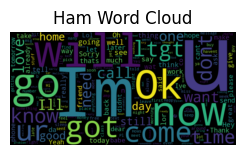

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

In [ ]:
plt.show()

**Step 5: Modeling**

In this step, we build machine learning models to classify text messages as spam or ham.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Initialize and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       1.00      0.70      0.82       136

    accuracy                           0.96      1032
   macro avg       0.98      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



**Step 6: Evaluation**

In this step, we assess the model's performance using various metrics to determine its effectiveness

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Evaluate the model on the test set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

In [ ]:
# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[896   0]
 [ 41  95]]


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       896
        spam       1.00      0.70      0.82       136

    accuracy                           0.96      1032
   macro avg       0.98      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



**Step 7: Deployment**

Once satisfied with the model's performance, it can be deployed in a real-world application, such as an email spam filter or a messaging app, to classify text messages as spam or ham in real-time.